# 자연어 처리

In [2]:
from konlpy.tag import Kkma # korean dev
from konlpy.utils import pprint

kkma = Kkma()

pprint(kkma.sentences('네, 안녕하세요. 반갑습니다.'))
pprint(kkma.nouns('금요일 저녁에 치킨과 맥주를 먹어야지'))

pprint(kkma.pos('동사(動詞)는 문장에서 동작, 상태, 존재 등을 나타내는 품사입니다. 즉, 영어의 "verb"에 해당하는 단어입니다.'))



['네, 안녕하세요.', '반갑습니다.']
['금요일', '저녁', '치킨', '맥주']
[('동사', 'NNG'),
 ('(', 'SS'),
 ('動詞', 'OH'),
 (')', 'SS'),
 ('늘', 'VV'),
 ('ㄴ', 'ETD'),
 ('문장', 'NNG'),
 ('에서', 'JKM'),
 ('동작', 'NNG'),
 (',', 'SP'),
 ('상태', 'NNG'),
 (',', 'SP'),
 ('존재', 'NNG'),
 ('등', 'NNB'),
 ('을', 'JKO'),
 ('나타내', 'VV'),
 ('는', 'ETD'),
 ('품사', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('즉', 'MAG'),
 (',', 'SP'),
 ('영어', 'NNG'),
 ('의', 'JKG'),
 ('"', 'SS'),
 ('verb', 'OL'),
 ('"', 'SS'),
 ('에', 'JKM'),
 ('해당', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('단어', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]


In [3]:
from konlpy.tag import Okt # twitter dev

okt = Okt()

text = '동사(動詞)는 문장에서 동작, 상태, 존재 등을 나타내는 품사입니다. 즉, 영어의 "verb"에 해당하는 단어입니다.'

print(okt.morphs(text)) # 전체를 하나씩 분절
print(okt.pos(text)) # 전체 분절을 품사별로 표현
print(okt.nouns(text)) # 한글 명사만 가져옴

['동사', '(', '動詞', ')', '는', '문장', '에서', '동작', ',', '상태', ',', '존재', '등', '을', '나타내는', '품사', '입니다', '.', '즉', ',', '영어', '의', '"', 'verb', '"', '에', '해당', '하는', '단어', '입니다', '.']
[('동사', 'Noun'), ('(', 'Punctuation'), ('動詞', 'Foreign'), (')', 'Punctuation'), ('는', 'Verb'), ('문장', 'Noun'), ('에서', 'Josa'), ('동작', 'Noun'), (',', 'Punctuation'), ('상태', 'Noun'), (',', 'Punctuation'), ('존재', 'Noun'), ('등', 'Noun'), ('을', 'Josa'), ('나타내는', 'Verb'), ('품사', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('즉', 'Noun'), (',', 'Punctuation'), ('영어', 'Noun'), ('의', 'Josa'), ('"', 'Punctuation'), ('verb', 'Alpha'), ('"', 'Punctuation'), ('에', 'Josa'), ('해당', 'Noun'), ('하는', 'Verb'), ('단어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
['동사', '문장', '동작', '상태', '존재', '등', '품사', '즉', '영어', '해당', '단어']


In [4]:
text2 = '저녁에 뭐 먹으까ㅋㅋ'

print(okt.pos(text2))
print(okt.pos(text2, norm=True)) # 표준어로 변환(완전하지 않음)
print(okt.pos(text2, stem=True)) # 공통 동사로 변환

[('저녁', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('먹으까', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('저녁', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('먹으까', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('저녁', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('먹다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [5]:
import pandas as pd

data = pd.read_csv('data/배달의민족댓글.csv')

# data1 = data.iloc[3:,:].reset_index(drop=True)

data2 = data.dropna().reset_index(drop=True)

data2.to_csv('data/rv.csv')

In [6]:
rv = pd.read_csv('data/rv.csv')

rv5 = rv['댓글'][:5]

temp_noun_list = []

for i, rv in enumerate(rv5.tolist()):
    result = okt.pos(rv)
    print(f'{i}번째 {result}')
    
    for word, pos in result:
        if pos == 'Noun':
            temp_noun_list.append(word)

print(len(temp_noun_list))

0번째 [('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('.', 'Punctuation'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adjective'), ('건지

In [7]:
import re # regular expression

text = "오늘!!!!!!!!!!!!!!!!!! ㅇㅇ너무  hello  ㅗㅓ HELLO 010-7894-5798   기분 좋아^^ ㅎㅇㅎㅇ"
new_text = re.sub(r"[^0-9a-zA-Z가-힣\s+-]", "", text)
print(new_text)


오늘 너무  hello   HELLO 010-7894-5798   기분 좋아 


In [8]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords) - ex) 배달의 민족 분석시 : 배달/민족/조사

rv = pd.read_csv('data/rv.csv')

data = rv['댓글'].tolist()

word_list = []
stop_words = ['배달', '민족', '배민', '주문']

for i, review in enumerate(data):
    
    # 1. 정규표현식 정제
    re_review = re.sub(r'[^0-9a-zA-Z가-힣\s+-]', '', review)

    # 2. 형태소 분석
    result = okt.nouns(re_review)

    for word in result:
        if len(word) == 1 or word in stop_words:
            continue

        word_list.append(word)

print(len(word_list))

from collections import Counter

counter = Counter(word_list)
counter.most_common(30)

9296


[('가게', 215),
 ('메뉴', 142),
 ('시간', 124),
 ('기능', 109),
 ('고객', 107),
 ('리뷰', 105),
 ('사용', 101),
 ('취소', 99),
 ('음식', 99),
 ('결제', 95),
 ('어플', 92),
 ('전화', 79),
 ('검색', 77),
 ('센터', 77),
 ('다른', 71),
 ('업데이트', 68),
 ('이용', 67),
 ('연결', 66),
 ('쿠폰', 66),
 ('계속', 61),
 ('문제', 57),
 ('다시', 55),
 ('그냥', 55),
 ('선택', 50),
 ('진짜', 50),
 ('생각', 49),
 ('상담', 49),
 ('하나', 47),
 ('화면', 46),
 ('확인', 46)]

# 3) 워드 클라우드

<>:19: SyntaxWarning: invalid escape sequence '\i'
<>:19: SyntaxWarning: invalid escape sequence '\i'
C:\Users\user\AppData\Local\Temp\ipykernel_18668\2406212717.py:19: SyntaxWarning: invalid escape sequence '\i'
  image = np.array(Image.open('resources\image.png'))


Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
NanumGothic C:\Windows\Fonts\.TTF
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Franklin Gothic Demi C:\Windows\Font

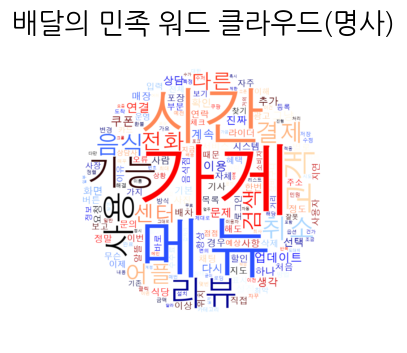

In [9]:
from matplotlib import font_manager
import koreanize_matplotlib

import numpy as np
from PIL import Image

from wordcloud import WordCloud
import matplotlib.pyplot as plt

search_font = 'gothic'

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower():
        print(font_name, font_path)

image = np.array(Image.open('resources\image.png'))

wc = WordCloud(
    font_path=r"C:\Windows\Fonts\H2GTRM.TTF",
    background_color="white",
    mask=image,
    colormap="flag",
    width=1200,
    height=800
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

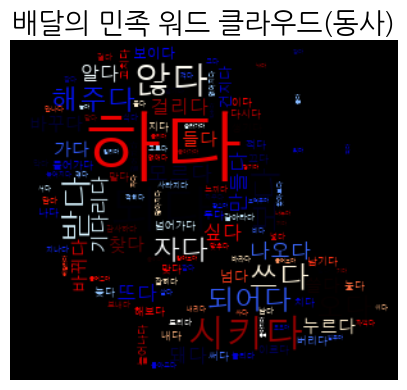

In [10]:
# 배달의 민족 동사에 대한 word cloud
# norm, stem 옵션 사용
# 새로운 mask 사용

rv = pd.read_csv('data/rv.csv')

data = rv['댓글'].tolist()

word_list = []

for review in data:

    re_review = re.sub(r'[^0-9a-zA-Z가-힣\s+-]', '', review)

    result = okt.pos(re_review, norm=True, stem=True)
    
    for word, kind in result:
        if len(word) == 1:
            continue
        
        if kind == 'Verb':
            word_list.append(word)

from collections import Counter

counter = Counter(word_list)

image = np.array(Image.open(r'resources\doramp.png'))

wc = WordCloud(
    font_path=r"C:\Windows\Fonts\H2GTRM.TTF",
    background_color="black",
    mask=image,
    colormap="flag",
    width=1200,
    height=800
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()
    


# 5) 검색

In [11]:
# 특정 단어가 포함된 문장 수집하여 분석

keyword = '취소'

review_list = []

for review in data:
    if(keyword in review):
        review_list.append(review)

        


# +Kiwi 형태소 분석기

In [12]:
from kiwipiepy import Kiwi 

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res, score in kiwi.analyze(text, top_n=5):
    print(score, result, sep="\t")

-65.28563690185547	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('1시간', 'Number'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.0050277709961	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('1시간', 'Number'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.7073745727539	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴

In [13]:
result = kiwi.tokenize(text) 

word_list = []

for res in result:
    if res.tag[0] == 'N':
        print(res.form)

text1 = '느좋'        

print(okt.pos(text1))
print(kkma.pos(text1))
print(kiwi.tokenize(text1))

배달
완료
나
[('느좋', 'Noun')]
[('느좋', 'UN')]
[Token(form='느좋', tag='NNG', start=0, len=2)]


# 2. 장바구니 분석
### 연관성 규칙 분석(기저귀 - 맥주)

In [15]:
review_list = pd.read_csv('data/rv.csv')['댓글'].tolist()

main_list = []

for rv in review_list:
    sub_list = []

    re_rv = re.sub(r'[^0-9a-zA-Z가-힣\s+-]', '', rv)

    noun_list = okt.nouns(re_rv)
    
    for word in noun_list:
        if len(word) == 1:
            continue
        sub_list.append(word)

    main_list.append(sub_list)

print(len(main_list))

for each in main_list:
    print(each)


460
['주문', '취소', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '정보', '코로나', '때문', '서버', '취소', '꼼짝']
['음식', '하나', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '다른', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '스탭', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제']
['업데이트', '사용', '점점', '클릭', '한번', '결제', '저쪽', '구석', '마치', '배달', '유도', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '정말', '배민']
['배달', '민족', '자체', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '체적', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '안해']
['장바구니', '마트', '여러가지', '크롤', '살짝', '대각선', '배달', '포장', '용량', '좌우', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '항목', '배달', '포장', '마트', '용량', '항목', '선택', '화면', '필요', '거의', '매일', '배

In [47]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

main_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

# 각 문장별로 해당하는 단어가 있는지 체크(T/F)

te = TransactionEncoder()
te_ary = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,국,김치,라면,반찬,밥
0,True,True,False,False,True
1,True,False,False,False,True
2,False,True,False,False,True
3,False,True,True,False,False
4,False,False,False,True,True
5,True,True,False,False,False


In [48]:
# 각 리뷰를 통들어 가장 자주 등장하는 단어 추출

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500000,(국)
1,0.666667,(김치)
2,0.666667,(밥)
3,0.333333,"(국, 김치)"
4,0.333333,"(밥, 국)"
5,0.333333,"(밥, 김치)"


In [49]:
# 분석결과

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(국),(김치),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
1,(김치),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
2,(밥),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
3,(국),(밥),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
